# Let us understand the basic text preprocessing and build a classification model

### Data Description 

- The dataset contains more than a thousand reviews about an application openly available to the public. The data includes reviews and sentiment, i.e., is the review positive or negative with various other variables.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
from collections import Counter

# Libraries for NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Libraries for ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

In [4]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To supress future warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [5]:
# Using display setting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.2f}'.format

In [6]:
data_df = pd.read_excel('../input/Canva_reviews.xlsx')

In [7]:
data_df.head(3)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533FmoxvwtULxu2YBbXfmhq6970jW2OET7OjXuTNPbUz82cWbAtk,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14Gg4pUoP3Bc6Lgata4x9jnR4bwKnT_eyLAMWaHs7fg,Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!,4,528,2.116.0,2021-06-17 07:18:54,"Hi Donna. We are sorry that your text or design turned out pixelated or poor quality. Check this link for possible reasons: https://bit.ly/2Pxkphr. For other concerns, report it at canva.me/android. Regards. - Ahn\n",2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-F1hD4TQaLg-fgsVyTLNaHOWFpVUEtAgJ-9ynp_vKWE3Y,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14Ghv6nzkP8W4xDBH0PfDbiDNSxlKbWGh_6s6U3avzg,Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2cGNaFzlL9r2gGkuuAVsO2Wf4kJdx8hIo4rgo9G3fBzMg,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14Gj__jHxXtCA8Q8vSwg1YM4df4OBUfySLJezPRJi,"Canva used to be a good app! But recently I've been facing issues in saving my files. When I want my files to be saved in '.png' format, it gets saved in .jpg format! Moreover when I want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) For now you'll be getting 1 stars from me. I hope you will fix the app soon! Thank you .",1,160,2.116.0,2021-06-23 19:13:28,"Hi there. We're sorry to hear that you are having trouble with the app. We will make sure to take note of this for us to improve the app. For us to check, kindly send us a screenshot or a recording of the issue and send it through canva.me/android. Kindly keep an eye to our future updates with performance improvements. Thank you -Gel",2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files


In [8]:
data_df.tail(3)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
1497,gp:AOqpTOFMqEqa_kpp29Q8wjcBmKUCAvOQGQx4KZQ8b83CHrEAEV3vJJbF_LPT36LfNgfobcO2g5BUVa2IopBkUns,GK Gaming,https://play-lh.googleusercontent.com/a-/AOh14GjWueIL9EMtuj-3KbUGYfQI0tyxqGYuEtoJ4-BXYw,Too much lag. Always stuck on starting page. Worst app. Don't download,1,0,2.118.0,2021-07-06 03:34:38,"Hello there, sorry if it is frustrating and just get frozen. Please force close the app and then restart it. You may also close apps that are not being used. Also, we recommend that you have it updated to get its full features. If error persists, let us know at canva.me/android. - Cynch",2021-07-19 01:19:18,Negative,others,NaN
1498,gp:AOqpTOGY4z3pUxeiqGzn2ad3Noxqlbm-9DZ3ksHqD1_CgjW_Emf7YaTIQwpj1A97BviNU8_GXSnUehpb5tVmn1s,1203_Vani Sharma,https://play-lh.googleusercontent.com/a-/AOh14Gi28Chszr86r8qzQuqcaHcwk2Iy20y7xBBOzViVHRE,Nice app for all college work. So many features and templates to work with. Loved it❤️,5,0,2.123.0,2021-08-07 18:47:15,NaN,NaT,Positive,extremely_happy,NaN
1499,gp:AOqpTOFVGZ0MXyR-Gv_d2cYf2KD709Hwple_u7OZE4yiKaAzHTquS_hu9Rvz_MHQkoIB-n8AUgezvqFH5cpMbiE,MeLLy EcK,https://play-lh.googleusercontent.com/a-/AOh14GhHSlPAWMQotXJVqKQECfuHSzofBthAzZcYl1ZqRwg,I am a teacher and this was so much for this school year! Love this.,5,0,2.117.0,2021-06-28 03:40:57,NaN,NaT,Positive,extremely_happy,NaN


In [9]:
data_df.shape

(1500, 13)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1500 non-null   object        
 1   userName              1500 non-null   object        
 2   userImage             1500 non-null   object        
 3   review                1500 non-null   object        
 4   score                 1500 non-null   int64         
 5   thumbsUpCount         1500 non-null   int64         
 6   reviewCreatedVersion  1500 non-null   object        
 7   at                    1500 non-null   datetime64[ns]
 8   replyContent          523 non-null    object        
 9   repliedAt             523 non-null    datetime64[ns]
 10  Sentiment             1500 non-null   object        
 11  Sub Category          1499 non-null   object        
 12  Sub Category_test     23 non-null     object        
dtypes: datetime64[ns](

In [11]:
data_df.iloc[13,3]
data_df.iloc[13,10]

'Unable to save my work. Nothing works :('

'Negative'

In [12]:
data_df.iloc[1495,3]
data_df.iloc[1495,10]

'Absolutely amazing and a lifesaver for teachers.'

'Positive'

### Plotting the Sentiment data

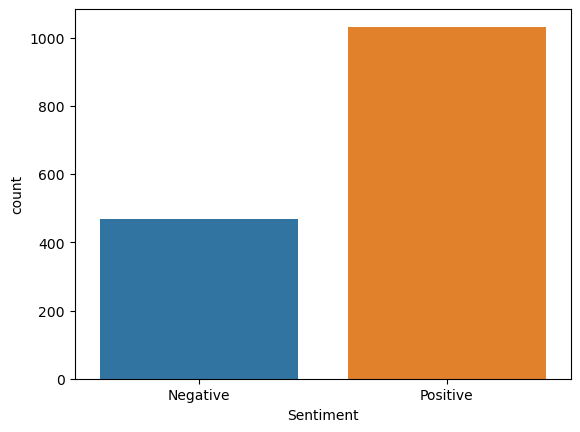

In [13]:
sns.countplot(x=data_df['Sentiment'])
plt.show();

### Relationship between 'score' and 'Sentiment'

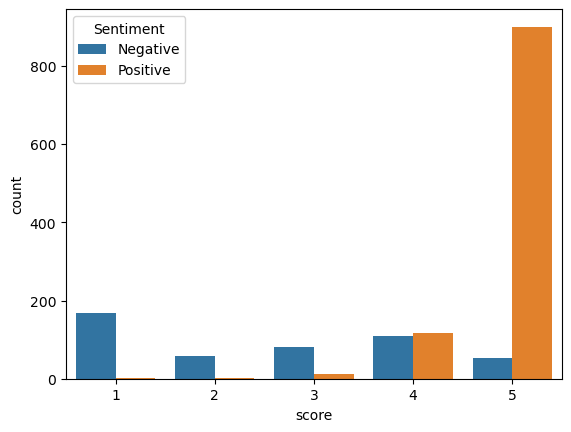

In [14]:
sns.countplot(x=data_df['score'], hue=data_df['Sentiment'])
plt.show();

### Length of Reviews of all records

In [15]:
data_df['Length_of_Review'] = data_df['review'].apply(lambda x: len(x))
data_df['Length_of_Review'].head(10)

0    481
1    438
2    382
3    378
4    366
5    327
6    441
7    323
8    344
9    498
Name: Length_of_Review, dtype: int64

In [16]:
data_df['Length_of_Review'].describe()

count   1500.00
mean      86.47
std       55.68
min       20.00
25%       54.00
50%       75.00
75%      102.00
max      498.00
Name: Length_of_Review, dtype: float64

### Distribution of Length of Reviews

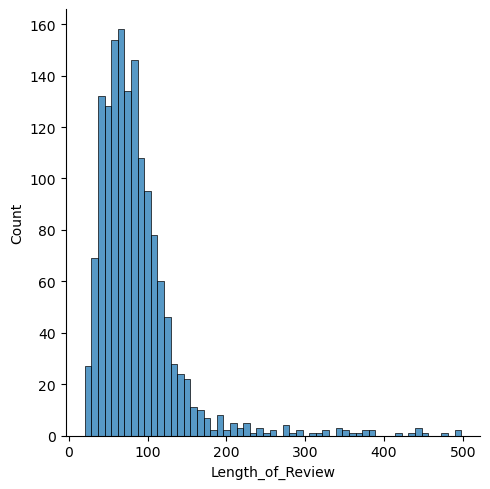

In [17]:
sns.displot(data_df['Length_of_Review'])
plt.show();

### Distribution of Length of Reviews for Sentiment Type

<Figure size 2500x480 with 0 Axes>

<Figure size 640x200 with 0 Axes>

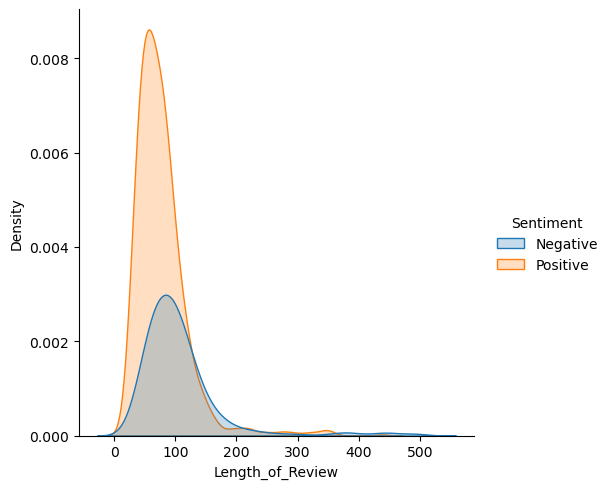

In [18]:
plt.figure().set_figwidth(25)
plt.figure().set_figheight(2)
sns.displot(data=data_df, x=data_df['Length_of_Review'], hue=data_df['Sentiment'], kind='kde', fill=True)
plt.show();

### Tokenization

In [19]:
tokenized_df = data_df[['review','Sentiment']]
tokenized_df.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!,Negative
1,Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤,Positive
2,"Canva used to be a good app! But recently I've been facing issues in saving my files. When I want my files to be saved in '.png' format, it gets saved in .jpg format! Moreover when I want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) For now you'll be getting 1 stars from me. I hope you will fix the app soon! Thank you .",Negative
3,"It's a brilliant app, but I have just one problem, if I'm editing a post and I double tap the photo to reposition, if I then start to zoom the photo, 8 times out of 10 my app crashes and restarts, this is on my LG G5 SE, sometimes I've had to go over to the desktop version on my PC just to reposition and zoom the photo where I want it to then resume editing back on my mobile.",Negative
4,"This was such a great app. I used to make BTS memes through this. But after recent update... I'm not able to change my font style. The edit option of font is missing. I tried uninstalling and installing the app, but still it's isn't working. The edit option for font is appearing very rarely. The previous version was far better. Canva could you please work on it! 💜",Negative


In [20]:
tokenized_df.loc[0,'review']

"Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!"

In [21]:
sent_tokenize(tokenized_df.loc[0,'review'])

["Overall it's really an amazing app.",
 "I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years?",
 "The texts were blurred and when you zoom it out it's pixelated.",
 'I thought this issue only occurs on mobile apps however it was also present on the website.',
 'Please fix this.',
 'I still remember the time when I can export high definition texts and I love that experience.',
 'Thank you!']

In [22]:
word_tokenize(tokenized_df.loc[0,'review'])

['Overall',
 'it',
 "'s",
 'really',
 'an',
 'amazing',
 'app',
 '.',
 'I',
 "'ve",
 'been',
 'using',
 'this',
 'for',
 'the',
 'past',
 '5',
 'years',
 'however',
 'I',
 'only',
 'have',
 'one',
 'issue',
 'though',
 'and',
 'I',
 'wanted',
 'this',
 'to',
 'get',
 'address',
 'since',
 'I',
 'think',
 'this',
 'issue',
 'had',
 'lasted',
 'for',
 'how',
 'many',
 'years',
 '?',
 'The',
 'texts',
 'were',
 'blurred',
 'and',
 'when',
 'you',
 'zoom',
 'it',
 'out',
 'it',
 "'s",
 'pixelated',
 '.',
 'I',
 'thought',
 'this',
 'issue',
 'only',
 'occurs',
 'on',
 'mobile',
 'apps',
 'however',
 'it',
 'was',
 'also',
 'present',
 'on',
 'the',
 'website',
 '.',
 'Please',
 'fix',
 'this',
 '.',
 'I',
 'still',
 'remember',
 'the',
 'time',
 'when',
 'I',
 'can',
 'export',
 'high',
 'definition',
 'texts',
 'and',
 'I',
 'love',
 'that',
 'experience',
 '.',
 'Thank',
 'you',
 '!']

### Convert texts to lower case

In [23]:
tokenized_df['review'] = tokenized_df['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
tokenized_df.head(2)

,review,Sentiment
0,overall it's really an amazing app. i've been using this for the past 5 years however i only have one issue though and i wanted this to get address since i think this issue had lasted for how many years? the texts were blurred and when you zoom it out it's pixelated. i thought this issue only occurs on mobile apps however it was also present on the website. please fix this. i still remember the time when i can export high definition texts and i love that experience. thank you!,Negative
1,hey! yes i gave a 5 star rating... coz i believe it deserves it! i mostly use the desktop version and i am seriously so satisfied with this app in both android and desktop version. i just came here to thank the developers for this beautiful app and its facilities. i literally find almost everything that i need for and the best part is even without the premium feature it provides us with a lot many facilities. i love it! thank you..! ❤,Positive


### Remving Stopwords from review

In [24]:
stop_words = stopwords.words('english')

#Custom Stoplist
custome_stopwords= ["hey!","it!","you!","i'm","i","i've","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your","yours","yourself","yourselves","he","him","his","himself","she",
                  "she's","her","hers","herself","it","it's","its","itself","they","them","their","theirs","themselves",
                  "what","which","who","whom","this","that","that'll","these","those","am","is","are","was","were","be","been",
                  "being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because",
                  "as","until","while","of","at","by","for","with","about","against","between","into","through","during",
                  "before","after","above","below","to","from","up","down","in","out","on","off","over","under","again",
                  "further","then","once","here","there","when","where","why","all","any","both","each","few","more","most",
                  "other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will",
                  "just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
                  "aren","couldn","didn","doesn","hadn","hasn","haven","isn","ma","mightn","mustn","needn","shan","shan't",
                  "shouldn","wasn","weren","won","rt","rt","qt","for","the","with","in","of","and","its","it","this","i",
                  "have","has","would","could","you","a","an","be","am","can","will","to","on","is","by","ive",
                  "im","your","we","are","at","as","any","ebay","thank","hello","know","need","want","look","hi","sorry",
                  "http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome",
                  "what","well","us"]

stop_words.extend(custome_stopwords)

In [25]:
tokenized_df['CleanedReview'] = tokenized_df['review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
tokenized_df['CleanedReview'].head(5)

0    overall really amazing app. using past 5 years however one issue though wanted get address since think issue lasted many years? texts blurred zoom pixelated. thought issue occurs mobile apps however also present website. please fix this. still remember time export high definition texts love experience.
1                           yes gave 5 star rating... coz believe deserves mostly use desktop version seriously satisfied app android desktop version. came developers beautiful app facilities. literally find almost everything best part even without premium feature provides lot many facilities. love you..! ❤
2                                                                               canva used good app! recently facing issues saving files. files saved '.png' format, gets saved .jpg format! moreover files saved gets stuck downloading screen (where called magic happen) getting 1 stars me. hope fix app soon! .
3                                                                        

### Removing Punctuations

In [26]:
# Function to preprocess the text
def remove_punctuations(text):
    """
        text: a string    
        return: modified initial string
    """
    # text = text.replace("\d+"," ") #removing digits
    text = re.sub(r"(?:\@|https?\://)\S+",'',text) #removing mentions and urls
    text = text.lower()
    text = re.sub('[0-9]+','',text) #removing numeric characters
    text = re.sub('[/(){}\[\]\|@,;!]',' ',text) # replace symbols by space in text
    text = re.sub('[^0-9a-z #+_]',' ',text) # replace symbols which are in BAD_SYMBOLS_RE from text
    text = text.strip()
    return text

In [27]:
import re
tokenized_df['CleanedReview'] = tokenized_df['CleanedReview'].apply(lambda x: remove_punctuations(x))
tokenized_df['CleanedReview'].head()

0    overall really amazing app  using past  years however one issue though wanted get address since think issue lasted many years  texts blurred zoom pixelated  thought issue occurs mobile apps however also present website  please fix this  still remember time export high definition texts love experience
1                               yes gave  star rating    coz believe deserves mostly use desktop version seriously satisfied app android desktop version  came developers beautiful app facilities  literally find almost everything best part even without premium feature provides lot many facilities  love you
2                                                                                 canva used good app  recently facing issues saving files  files saved   png  format  gets saved  jpg format  moreover files saved gets stuck downloading screen  where called magic happen  getting  stars me  hope fix app soon
3                                                                              

### Stemming Reviews

__Not a good approach to follow or use as it changes the words which distorts meaning__

In [28]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
tokenized_df['CleanedReview'].apply(lambda x: ' '.join(porter_stemmer.stem(word) for word in x.split()))

0       overal realli amaz app use past year howev one issu though want get address sinc think issu last mani year text blur zoom pixel thought issu occur mobil app howev also present websit pleas fix thi still rememb time export high definit text love experi
1                           ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came develop beauti app facil liter find almost everyth best part even without premium featur provid lot mani facil love you
2                                                                           canva use good app recent face issu save file file save png format get save jpg format moreov file save get stuck download screen where call magic happen get star me hope fix app soon
3                                                                                brilliant app one problem edit post doubl tap photo reposit start zoom photo time app crash restart lg g se sometim go desktop version pc r

### Stemming using LancasterStemmer

__It seems to be more accurate than PortStemmer__

In [29]:
from nltk.stem import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
tokenized_df['CleanedReview'].apply(lambda x: ' '.join(lancaster_stemmer.stem(word) for word in x.split()))

0       overal real amaz ap us past year howev on issu though want get address sint think issu last many year text blur zoom pixel thought issu occ mobl ap howev also pres websit pleas fix thi stil rememb tim export high definit text lov expery
1                                       ye gav star rat coz believ deserv most us desktop vert sery satisfy ap android desktop vert cam develop beauty ap facil lit find almost everyth best part ev without prem feat provid lot many facil lov you
2                                                                                       canv us good ap rec fac issu sav fil fil sav png form get sav jpg form moreov fil sav get stuck download screen wher cal mag hap get star me hop fix ap soon
3                                                                              bril ap on problem edit post doubl tap photo reposit start zoom photo tim ap crash restart lg g se sometim go desktop vert pc reposit zoom photo resum edit back mobl
4                   

### Stemming using WordnetLamentizer

__This is the best Stemming Library. It reduces most of the different forms of word to Root words.__

In [30]:
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()
tokenized_df['CleanedReview'] = tokenized_df['CleanedReview'].apply(lambda x: ' '.join(wordnet.lemmatize(word) for word in x.split()))
tokenized_df['CleanedReview'].head(5)

0    overall really amazing app using past year however one issue though wanted get address since think issue lasted many year text blurred zoom pixelated thought issue occurs mobile apps however also present website please fix this still remember time export high definition text love experience
1                                 yes gave star rating coz believe deserves mostly use desktop version seriously satisfied app android desktop version came developer beautiful app facility literally find almost everything best part even without premium feature provides lot many facility love you
2                                                                                          canva used good app recently facing issue saving file file saved png format get saved jpg format moreover file saved get stuck downloading screen where called magic happen getting star me hope fix app soon
3                                                                                                   brilliant

### Word Count of Reviews

In [31]:
flat_tokens = [word for line in tokenized_df['CleanedReview'] for word in line.split()]

In [32]:
len(flat_tokens)

13429

In [33]:
flat_tokens[:10]

['overall',
 'really',
 'amazing',
 'app',
 'using',
 'past',
 'year',
 'however',
 'one',
 'issue']

In [34]:
from collections import Counter

counts = Counter(flat_tokens)
len(counts)
counts.most_common(20)

1976

[('app', 904),
 ('use', 320),
 ('easy', 295),
 ('design', 268),
 ('good', 223),
 ('love', 197),
 ('great', 185),
 ('best', 165),
 ('canva', 162),
 ('really', 130),
 ('make', 127),
 ('free', 113),
 ('editing', 112),
 ('work', 112),
 ('it', 112),
 ('amazing', 111),
 ('time', 103),
 ('template', 103),
 ('nice', 102),
 ('like', 101)]

### Bag of Words - Binary. (2 gram)

In [35]:
tokenized_df.loc[13,'CleanedReview']

'unable save work nothing work'

In [36]:
count_vector = CountVectorizer(binary=True, min_df=5)
X = count_vector.fit_transform(tokenized_df['CleanedReview'])
X.shape

(1500, 430)

In [37]:
len(count_vector.vocabulary_)

430

In [38]:
type(X) # This is Sparse Matrix. Need to convert to array to view the data

scipy.sparse._csr.csr_matrix

In [39]:
X_array = X.toarray()

In [40]:
X_array[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
tokenized_df.loc[13,'CleanedReview']

'unable save work nothing work'

In [42]:
count_vector.get_feature_names_out()

array(['aap', 'able', 'absolutely', 'access', 'account', 'ad', 'add',
       'adding', 'again', 'all', 'almost', 'alot', 'already', 'also',
       'always', 'amazing', 'and', 'android', 'animation', 'annoying',
       'another', 'anyone', 'anything', 'app', 'application',
       'appreciate', 'apps', 'art', 'attractive', 'auto', 'automatically',
       'available', 'away', 'awesome', 'back', 'background', 'bad',
       'banner', 'basic', 'beautiful', 'beginner', 'best', 'better',
       'birthday', 'bit', 'brilliant', 'bug', 'business', 'but', 'can',
       'cannot', 'cant', 'canva', 'canvas', 'card', 'change', 'channel',
       'charged', 'check', 'choose', 'collage', 'come', 'company',
       'complete', 'connection', 'content', 'convenient', 'cool', 'cover',
       'crash', 'create', 'created', 'creating', 'creative', 'creativity',
       'creator', 'daily', 'data', 'day', 'definitely', 'design',
       'designed', 'designer', 'designing', 'desktop', 'developer',
       'device', 'd

In [43]:
tokenized_df['Sentiment'] = tokenized_df['Sentiment'].apply(lambda x: 1 if x =='Positive' else 0)
y = tokenized_df['Sentiment']

In [44]:
tokenized_df.head(3)

,review,Sentiment,CleanedReview
0,overall it's really an amazing app. i've been using this for the past 5 years however i only have one issue though and i wanted this to get address since i think this issue had lasted for how many years? the texts were blurred and when you zoom it out it's pixelated. i thought this issue only occurs on mobile apps however it was also present on the website. please fix this. i still remember the time when i can export high definition texts and i love that experience. thank you!,0,overall really amazing app using past year however one issue though wanted get address since think issue lasted many year text blurred zoom pixelated thought issue occurs mobile apps however also present website please fix this still remember time export high definition text love experience
1,hey! yes i gave a 5 star rating... coz i believe it deserves it! i mostly use the desktop version and i am seriously so satisfied with this app in both android and desktop version. i just came here to thank the developers for this beautiful app and its facilities. i literally find almost everything that i need for and the best part is even without the premium feature it provides us with a lot many facilities. i love it! thank you..! ❤,1,yes gave star rating coz believe deserves mostly use desktop version seriously satisfied app android desktop version came developer beautiful app facility literally find almost everything best part even without premium feature provides lot many facility love you
2,"canva used to be a good app! but recently i've been facing issues in saving my files. when i want my files to be saved in '.png' format, it gets saved in .jpg format! moreover when i want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) for now you'll be getting 1 stars from me. i hope you will fix the app soon! thank you .",0,canva used good app recently facing issue saving file file saved png format get saved jpg format moreover file saved get stuck downloading screen where called magic happen getting star me hope fix app soon


### Splitting the datasets into train and test data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=123)

### Logistic Regression

In [46]:
lr_model_01 = LogisticRegression()
lr_model_01.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_train_lr_predicted = lr_model_01.predict(X_train)
print(f'Score -{metrics.accuracy_score(y_train, y_train_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_train, y_train_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_train, y_train_lr_predicted)}')

Score -0.9625
Classification Report -
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       374
           1       0.96      0.99      0.97       826

    accuracy                           0.96      1200
   macro avg       0.97      0.94      0.96      1200
weighted avg       0.96      0.96      0.96      1200

Confusion Matrix -
[[336  38]
 [  7 819]]


In [48]:
y_test_lr_predicted = lr_model_01.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_lr_predicted)}')

Score -0.9133333333333333
Classification Report -
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        94
           1       0.92      0.96      0.94       206

    accuracy                           0.91       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix -
[[ 77  17]
 [  9 197]]


### Save both the vectorizer and the model

In [49]:
with open("../output/binary_count_vector.pkl", "wb") as f:
    pickle.dump(count_vector, f)
with open("../output/binary_count_vector_model.pkl", "wb") as f:
    pickle.dump(lr_model_01, f)

### Bag of Words - Non Binary

In [50]:
tokenized_df.loc[13,'CleanedReview']

'unable save work nothing work'

In [51]:
count_vector2 = CountVectorizer(min_df=5)
X = count_vector2.fit_transform(tokenized_df['CleanedReview'])
X.shape

(1500, 430)

In [52]:
len(count_vector2.vocabulary_)

430

In [53]:
type(X) # This is Sparse Matrix. Need to convert to array to view the data

scipy.sparse._csr.csr_matrix

In [54]:
X_array = X.toarray()

In [55]:
X_array[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
tokenized_df.loc[13,'CleanedReview']

'unable save work nothing work'

In [57]:
count_vector2.get_feature_names_out()

array(['aap', 'able', 'absolutely', 'access', 'account', 'ad', 'add',
       'adding', 'again', 'all', 'almost', 'alot', 'already', 'also',
       'always', 'amazing', 'and', 'android', 'animation', 'annoying',
       'another', 'anyone', 'anything', 'app', 'application',
       'appreciate', 'apps', 'art', 'attractive', 'auto', 'automatically',
       'available', 'away', 'awesome', 'back', 'background', 'bad',
       'banner', 'basic', 'beautiful', 'beginner', 'best', 'better',
       'birthday', 'bit', 'brilliant', 'bug', 'business', 'but', 'can',
       'cannot', 'cant', 'canva', 'canvas', 'card', 'change', 'channel',
       'charged', 'check', 'choose', 'collage', 'come', 'company',
       'complete', 'connection', 'content', 'convenient', 'cool', 'cover',
       'crash', 'create', 'created', 'creating', 'creative', 'creativity',
       'creator', 'daily', 'data', 'day', 'definitely', 'design',
       'designed', 'designer', 'designing', 'desktop', 'developer',
       'device', 'd

In [58]:
# tokenized_df['Sentiment'] = tokenized_df['Sentiment'].apply(lambda x: 1 if x =='Positive' else 0)
# y = tokenized_df['Sentiment']

In [59]:
tokenized_df.head(3)

,review,Sentiment,CleanedReview
0,overall it's really an amazing app. i've been using this for the past 5 years however i only have one issue though and i wanted this to get address since i think this issue had lasted for how many years? the texts were blurred and when you zoom it out it's pixelated. i thought this issue only occurs on mobile apps however it was also present on the website. please fix this. i still remember the time when i can export high definition texts and i love that experience. thank you!,0,overall really amazing app using past year however one issue though wanted get address since think issue lasted many year text blurred zoom pixelated thought issue occurs mobile apps however also present website please fix this still remember time export high definition text love experience
1,hey! yes i gave a 5 star rating... coz i believe it deserves it! i mostly use the desktop version and i am seriously so satisfied with this app in both android and desktop version. i just came here to thank the developers for this beautiful app and its facilities. i literally find almost everything that i need for and the best part is even without the premium feature it provides us with a lot many facilities. i love it! thank you..! ❤,1,yes gave star rating coz believe deserves mostly use desktop version seriously satisfied app android desktop version came developer beautiful app facility literally find almost everything best part even without premium feature provides lot many facility love you
2,"canva used to be a good app! but recently i've been facing issues in saving my files. when i want my files to be saved in '.png' format, it gets saved in .jpg format! moreover when i want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) for now you'll be getting 1 stars from me. i hope you will fix the app soon! thank you .",0,canva used good app recently facing issue saving file file saved png format get saved jpg format moreover file saved get stuck downloading screen where called magic happen getting star me hope fix app soon


### Splitting the datasets into train and test data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=123)

### Logistic Regression

In [61]:
lr_model_02 = LogisticRegression()
lr_model_02.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_train_lr_predicted = lr_model_02.predict(X_train)
print(f'Score -{metrics.accuracy_score(y_train, y_train_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_train, y_train_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_train, y_train_lr_predicted)}')

Score -0.9616666666666667
Classification Report -
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       374
           1       0.96      0.99      0.97       826

    accuracy                           0.96      1200
   macro avg       0.97      0.95      0.95      1200
weighted avg       0.96      0.96      0.96      1200

Confusion Matrix -
[[337  37]
 [  9 817]]


In [63]:
y_test_lr_predicted = lr_model_02.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_lr_predicted)}')

Score -0.91
Classification Report -
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        94
           1       0.92      0.96      0.94       206

    accuracy                           0.91       300
   macro avg       0.91      0.88      0.89       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix -
[[ 76  18]
 [  9 197]]


### Save both the vectorizer and the model

In [64]:
with open("../output/nonbinary_count_vector.pkl", "wb") as f:
    pickle.dump(count_vector2, f)
with open("../output/nonbinary_count_vector_model.pkl", "wb") as f:
    pickle.dump(lr_model_02, f)

### Bag of Words - ngram

In [65]:
tokenized_df.loc[13,'CleanedReview']

'unable save work nothing work'

In [66]:
count_vector3 = CountVectorizer(min_df=5, ngram_range=(1,3))
X = count_vector3.fit_transform(tokenized_df['CleanedReview'])
X.shape

(1500, 636)

In [67]:
len(count_vector3.vocabulary_)

636

In [68]:
type(X) # This is Sparse Matrix. Need to convert to array to view the data

scipy.sparse._csr.csr_matrix

In [69]:
X_array = X.toarray()

In [70]:
X_array[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
tokenized_df.loc[13,'CleanedReview']

'unable save work nothing work'

In [72]:
count_vector3.get_feature_names_out()

array(['aap', 'able', 'absolutely', 'absolutely love',
       'absolutely love app', 'access', 'account', 'ad', 'add', 'adding',
       'again', 'all', 'almost', 'alot', 'already', 'also', 'always',
       'amazing', 'amazing app', 'amazing application', 'amazing design',
       'and', 'android', 'animation', 'annoying', 'another', 'anyone',
       'anything', 'app', 'app amazing', 'app awesome', 'app beginner',
       'app best', 'app canva', 'app create', 'app creating',
       'app design', 'app designing', 'app designing logo', 'app easy',
       'app easy use', 'app edit', 'app editing', 'app ever',
       'app ever used', 'app everything', 'app good', 'app graphic',
       'app graphic design', 'app great', 'app help', 'app helpful',
       'app it', 'app keep', 'app like', 'app logo', 'app lot',
       'app love', 'app love it', 'app make', 'app making', 'app many',
       'app much', 'app one', 'app really', 'app take', 'app use',
       'app used', 'app useful', 'app work', 'a

In [73]:
# tokenized_df['Sentiment'] = tokenized_df['Sentiment'].apply(lambda x: 1 if x =='Positive' else 0)
# y = tokenized_df['Sentiment']

In [74]:
tokenized_df.head(3)

,review,Sentiment,CleanedReview
0,overall it's really an amazing app. i've been using this for the past 5 years however i only have one issue though and i wanted this to get address since i think this issue had lasted for how many years? the texts were blurred and when you zoom it out it's pixelated. i thought this issue only occurs on mobile apps however it was also present on the website. please fix this. i still remember the time when i can export high definition texts and i love that experience. thank you!,0,overall really amazing app using past year however one issue though wanted get address since think issue lasted many year text blurred zoom pixelated thought issue occurs mobile apps however also present website please fix this still remember time export high definition text love experience
1,hey! yes i gave a 5 star rating... coz i believe it deserves it! i mostly use the desktop version and i am seriously so satisfied with this app in both android and desktop version. i just came here to thank the developers for this beautiful app and its facilities. i literally find almost everything that i need for and the best part is even without the premium feature it provides us with a lot many facilities. i love it! thank you..! ❤,1,yes gave star rating coz believe deserves mostly use desktop version seriously satisfied app android desktop version came developer beautiful app facility literally find almost everything best part even without premium feature provides lot many facility love you
2,"canva used to be a good app! but recently i've been facing issues in saving my files. when i want my files to be saved in '.png' format, it gets saved in .jpg format! moreover when i want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) for now you'll be getting 1 stars from me. i hope you will fix the app soon! thank you .",0,canva used good app recently facing issue saving file file saved png format get saved jpg format moreover file saved get stuck downloading screen where called magic happen getting star me hope fix app soon


### Splitting the datasets into train and test data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=123)

### Logistic Regression

In [76]:
lr_model_03 = LogisticRegression()
lr_model_03.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_train_lr_predicted = lr_model_03.predict(X_train)
print(f'Score -{metrics.accuracy_score(y_train, y_train_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_train, y_train_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_train, y_train_lr_predicted)}')

Score -0.9675
Classification Report -
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       374
           1       0.96      0.99      0.98       826

    accuracy                           0.97      1200
   macro avg       0.97      0.95      0.96      1200
weighted avg       0.97      0.97      0.97      1200

Confusion Matrix -
[[341  33]
 [  6 820]]


In [78]:
y_test_lr_predicted = lr_model_03.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_lr_predicted)}')

Score -0.9066666666666666
Classification Report -
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        94
           1       0.92      0.95      0.93       206

    accuracy                           0.91       300
   macro avg       0.90      0.88      0.89       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix -
[[ 77  17]
 [ 11 195]]


### Save both the vectorizer and the model

In [79]:
with open("../output/ngram_count_vector.pkl", "wb") as f:
    pickle.dump(count_vector3, f)
with open("../output/ngram_count_vector_model.pkl", "wb") as f:
    pickle.dump(lr_model_03, f)

### Using TF-IDF Vectroizer Models

In [80]:
tfidf_vector = TfidfVectorizer(min_df=5)
X = tfidf_vector.fit_transform(tokenized_df['CleanedReview'])
X.shape

(1500, 430)

### Splitting the datasets into train and test data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=123)

### Logistic Regression

In [82]:
lr_model_04 = LogisticRegression()
lr_model_04.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_train_lr_predicted = lr_model_04.predict(X_train)
print(f'Score -{metrics.accuracy_score(y_train, y_train_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_train, y_train_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_train, y_train_lr_predicted)}')

Score -0.9341666666666667
Classification Report -
              precision    recall  f1-score   support

           0       0.97      0.81      0.89       374
           1       0.92      0.99      0.95       826

    accuracy                           0.93      1200
   macro avg       0.95      0.90      0.92      1200
weighted avg       0.94      0.93      0.93      1200

Confusion Matrix -
[[304  70]
 [  9 817]]


In [84]:
y_test_lr_predicted = lr_model_04.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_lr_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_lr_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_lr_predicted)}')

Score -0.89
Classification Report -
              precision    recall  f1-score   support

           0       0.91      0.72      0.80        94
           1       0.88      0.97      0.92       206

    accuracy                           0.89       300
   macro avg       0.90      0.84      0.86       300
weighted avg       0.89      0.89      0.89       300

Confusion Matrix -
[[ 68  26]
 [  7 199]]


### Save both the vectorizer and the model

In [85]:
with open("../output/tfidf_count_vector.pkl", "wb") as f:
    pickle.dump(tfidf_vector, f)
with open("../output/tfidf_count_vector_model.pkl", "wb") as f:
    pickle.dump(lr_model_04, f)

## Predictions for new reviews

In [86]:
# Sample test reviews
test_review_1 = '''this is a truly amazing app , best for those who havw 
content but don't know how to express it in a good and shareable manner. 
Thanks Team Canva for such a great app.'''
test_review_2 = '''Its the worst app ever I save my design but it does not save'''

In [87]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

In [88]:
test_df = pd.DataFrame(data=[test_review_1,test_review_2], columns=['review'])

In [89]:
test_df['CleanedReview'] = test_df['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
test_df['CleanedReview'] = test_df['CleanedReview'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
test_df['CleanedReview'] = test_df['CleanedReview'].apply(lambda x: remove_punctuations(x))

In [90]:
stem = 'wordnet'
if stem =='porter_stemmer':
    porter_stemmer = PorterStemmer()
    test_df['CleanedReview'] = test_df['CleanedReview'].apply(lambda x: ' '.join(porter_stemmer.stem(word) for word in x.split()))
elif stem =='lancaster_stemmer':
    lancaster_stemmer = LancasterStemmer()
    test_df['CleanedReview'] = test_df['CleanedReview'].apply(lambda x: ' '.join(lancaster_stemmer.stem(word) for word in x.split()))
elif stem =='wordnet':
    wordnet = WordNetLemmatizer()
    test_df['CleanedReview'] = test_df['CleanedReview'].apply(lambda x: ' '.join(wordnet.lemmatize(word) for word in x.split()))

In [92]:
test_df.head()

,review,CleanedReview
0,"this is a truly amazing app , best for those who havw \ncontent but don't know how to express it in a good and shareable manner. \nThanks Team Canva for such a great app.",truly amazing app best havw content express good shareable manner team canva great app
1,Its the worst app ever I save my design but it does not save,worst app ever save design save


In [91]:
# vectorizor = 'binary_bag_of_words'
# if vectorizor =='binary_bag_of_words':
#     count_vector = CountVectorizer(binary=True, min_df=5)
#     X = count_vector.fit_transform(test_df['CleanedReview'])
#     X.shape
# elif vectorizor =='bag_of_words':
#     count_vector = CountVectorizer(min_df=5)
#     X = count_vector.fit_transform(test_df['CleanedReview'])
#     X.shape
# elif vectorizor =='ngrams':
#     count_vector3 = CountVectorizer(min_df=5, ngram_range=(1,3))
#     X = count_vector3.fit_transform(test_df['CleanedReview'])
#     X.shape
# elif vectorizor =='tfidf':
#     tfidf_vector = TfidfVectorizer(min_df=5)
#     X = tfidf_vector.fit_transform(test_df['CleanedReview'])
#     X.shape
# else:
#     print('Please use a valid Vectorizor')

In [93]:
with open("../output/ngram_count_vector.pkl", "rb") as f:
    vectorizer = pickle.load(f)

In [96]:
test_df.loc[0,'CleanedReview']

'truly amazing app best havw content express good shareable manner team canva great app'

In [98]:
X_test = vectorizer.transform(test_df['CleanedReview'])

In [99]:
X_test.shape

(2, 636)

In [100]:
with open("../output/ngram_count_vector_model.pkl", "rb") as f:
    loaded_model= pickle.load(f)

In [101]:
loaded_model.predict_proba(X_test)

array([[0.00224733, 0.99775267],
       [0.97730513, 0.02269487]])

In [102]:
loaded_model.predict(X_test)

array([1, 0], dtype=int64)